In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from code.fasttext.embedding_utils import TableEncoder, compare_embeddings_of, show_most_similar_rows, drop_columns_with_only_nan

In [2]:
data = {
    'presidents': '/home/giovanni/unimore/TESI/src/data/us_presidents/List_of_presidents_of_the_United_States_1.csv',
    'parks': '/home/giovanni/unimore/TESI/src/data/us_national_parks/List_of_national_parks_of_the_United_States_1.csv',
    'forests': '/home/giovanni/unimore/TESI/src/data/us_national_forests/List_of_national_forests_of_the_United_States_1.csv'
}

In [3]:
presidents_df = pd.read_csv(data['presidents'])
parks_df = pd.read_csv(data['parks'])
forests_df = pd.read_csv(data['forests'])

In [4]:
presidents_df.shape, parks_df.shape, forests_df.shape

((46, 8), (63, 7), (134, 6))

In [5]:
presidents_df.head()

,No.,Portrait,Name\n(Birth–Death),Term,Party,Party.1,Election,Vice President
0,1,NaN,George Washington\n(1732–1799),"April 30, 1789\n–\nMarch 4, 1797",NaN,Unaffiliated,1788–1789\n\n1792,John Adams
1,2,NaN,John Adams\n(1735–1826),"March 4, 1797\n–\nMarch 4, 1801",NaN,Federalist,1796,Thomas Jefferson
2,3,NaN,Thomas Jefferson\n(1743–1826),"March 4, 1801\n–\nMarch 4, 1809",NaN,Democratic-\nRepublican,1800\n\n\n1804,Aaron Burr\n\nGeorge Clinton
3,4,NaN,James Madison\n(1751–1836),"March 4, 1809\n–\nMarch 4, 1817",NaN,Democratic-\nRepublican,1808\n\n1812,"George Clinton\n\nVacant after\nApril 20, 1812..."
4,5,NaN,James Monroe\n(1758–1831),"March 4, 1817\n–\nMarch 4, 1825",NaN,Democratic-\nRepublican,1816\n\n1820,Daniel D. Tompkins


In [6]:
presidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No.                 46 non-null     int64  
 1   Portrait            0 non-null      float64
 2   Name
(Birth–Death)  46 non-null     object 
 3   Term                46 non-null     object 
 4   Party               0 non-null      float64
 5   Party.1             46 non-null     object 
 6   Election            46 non-null     object 
 7   Vice President      46 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.0+ KB


In [7]:
presidents_df.dropna(axis='columns', how='all', inplace=True)
parks_df.dropna(axis='columns', how='all', inplace=True)
forests_df.dropna(axis='columns', how='all', inplace=True)

In [8]:
tabenc = TableEncoder()

## Comparing Columns

In [20]:
m = pd.merge(
    compare_embeddings_of(presidents_df, parks_df, tabenc, 'columns'),
    compare_embeddings_of(presidents_df, parks_df, tabenc, 'columns', add_label=True),
    on=['C1', 'C2'],
    suffixes=['', '_wlabel']
)
m['delta'] = (m['cosine similarity'] - m['cosine similarity_wlabel']).apply(lambda x: format(x, ".3f"))
m.head(10)

,C1,C2,cosine similarity,cosine similarity_wlabel,delta
0,Term,Date established as park,0.974933,0.974743,0.000
1,No.,Recreation visitors (2022),0.952524,0.952346,0.000
2,No.,Area (2023),0.920319,0.919993,0.000
3,Term,Recreation visitors (2022),0.911958,0.91159,0.000
4,No.,Date established as park,0.911736,0.911257,0.000
5,Term,Area (2023),0.882683,0.881662,0.001
6,No.,Location,0.864914,0.864849,0.000
7,Term,Location,0.853765,0.85283,0.001
8,Vice President,Location,0.712868,0.710535,0.002
9,Vice President,Date established as park,0.701793,0.701207,0.001


<Axes: >

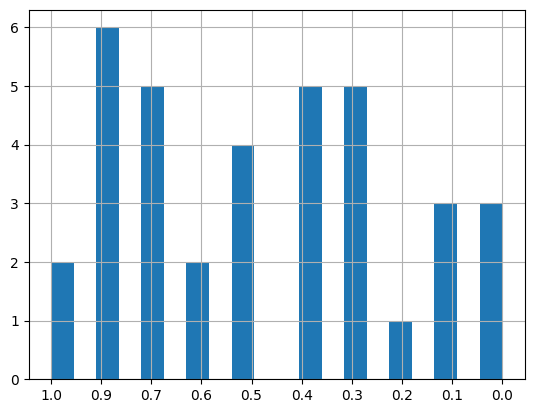

In [26]:
m['cosine similarity'].apply(lambda x: format(x, ".1f")).hist(bins=20)

In [12]:
presidents_df.head()

,No.,Name\n(Birth–Death),Term,Party.1,Election,Vice President
0,1,George Washington\n(1732–1799),"April 30, 1789\n–\nMarch 4, 1797",Unaffiliated,1788–1789\n\n1792,John Adams
1,2,John Adams\n(1735–1826),"March 4, 1797\n–\nMarch 4, 1801",Federalist,1796,Thomas Jefferson
2,3,Thomas Jefferson\n(1743–1826),"March 4, 1801\n–\nMarch 4, 1809",Democratic-\nRepublican,1800\n\n\n1804,Aaron Burr\n\nGeorge Clinton
3,4,James Madison\n(1751–1836),"March 4, 1809\n–\nMarch 4, 1817",Democratic-\nRepublican,1808\n\n1812,"George Clinton\n\nVacant after\nApril 20, 1812..."
4,5,James Monroe\n(1758–1831),"March 4, 1817\n–\nMarch 4, 1825",Democratic-\nRepublican,1816\n\n1820,Daniel D. Tompkins


In [14]:
parks_df.head()

,Name,Location,Date established as park,Area (2023),Recreation visitors (2022),Description
0,Acadia,Maine\n44°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W﻿ / ...,"February 26, 1919","49,071.40 acres (198.6 km2)","3,970,260",Covering most of Mount Desert Island and other...
1,American Samoa,American Samoa\n14°15′S 170°41′W﻿ / ﻿14.25°S 1...,"October 31, 1988","8,256.67 acres (33.4 km2)","12,135",The southernmost national park is on three Sam...
2,Arches,Utah\n38°41′N 109°34′W﻿ / ﻿38.68°N 109.57°W﻿ /...,"November 12, 1971","76,678.98 acres (310.3 km2)","1,460,652","This site features more than 2,000 natural san..."
3,Badlands,South Dakota\n43°45′N 102°30′W﻿ / ﻿43.75°N 102...,"November 10, 1978","242,755.94 acres (982.4 km2)","1,006,809","The Badlands are a collection of buttes, pinna..."
4,Big Bend †,Texas\n29°15′N 103°15′W﻿ / ﻿29.25°N 103.25°W﻿ ...,"June 12, 1944","801,163.21 acres (3,242.2 km2)","514,107",Named for the prominent bend in the Rio Grande...


In [33]:
m = pd.merge(
    compare_embeddings_of(forests_df, parks_df, tabenc, 'columns'),
    compare_embeddings_of(forests_df, parks_df, tabenc, 'columns', add_label=True),
    on=['C1', 'C2'],
    suffixes=['', '_wlabel']
)
m['delta'] = (m['cosine similarity'] - m['cosine similarity_wlabel']).apply(lambda x: format(x, ".3f"))
m.head()

,C1,C2,cosine similarity,cosine similarity_wlabel,delta
0,LocationB,Location,0.992477,0.992475,0.000
1,Area,Area (2023),0.989032,0.989035,-0.000
2,Date formedC,Date established as park,0.987329,0.987331,-0.000
3,DescriptionD,Description,0.917806,0.917189,0.001
4,Area,Recreation visitors (2022),0.91592,0.91581,0.000


In [34]:
m

,C1,C2,cosine similarity,cosine similarity_wlabel,delta
0,LocationB,Location,0.992477,0.992475,0.000
1,Area,Area (2023),0.989032,0.989035,-0.000
2,Date formedC,Date established as park,0.987329,0.987331,-0.000
3,DescriptionD,Description,0.917806,0.917189,0.001
4,Area,Recreation visitors (2022),0.91592,0.91581,0.000
5,LocationB,Recreation visitors (2022),0.900158,0.899926,0.000
6,LocationB,Area (2023),0.896463,0.896213,0.000
7,Date formedC,Recreation visitors (2022),0.886727,0.88689,-0.000
8,Area,Date established as park,0.865362,0.865199,0.000
9,Date formedC,Area (2023),0.863054,0.86269,0.000


<Axes: >

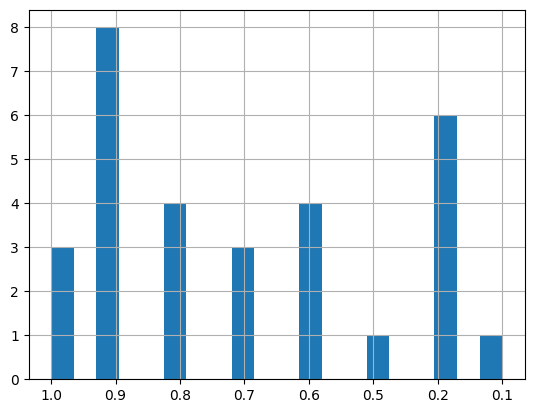

In [30]:
m['cosine similarity'].apply(lambda x: format(x, ".1f")).hist(bins=20)

In [31]:
forests_df.head()

,NameA,LocationB,Date formedC,Area,DescriptionD
0,Allegheny,Pennsylvania\n41°39′N 79°01′W﻿ / ﻿41.650°N 79....,"September 24, 1923","513,655 acres (2,078.7 km2)",Pennsylvania's only national forest includes K...
1,Angeles,California\n34°24′N 118°10′W﻿ / ﻿34.400°N 118....,"December 20, 1892","661,565 acres (2,677.3 km2)",Located in the San Gabriel Mountains at the ed...
2,Angelina,Texas\n31°13′N 94°17′W﻿ / ﻿31.217°N 94.283°W﻿ ...,"October 13, 1936","154,140 acres (623.8 km2)","Primarily longleaf, loblolly, and shortleaf pi..."
3,Apache–Sitgreaves,"Arizona, New Mexico\n33°44′N 109°05′W﻿ / ﻿33.7...","August 17, 1898","2,626,306 acres (10,628.3 km2)",Encompassing the Mogollon Rim and White Mounta...
4,Apalachicola,Florida\n30°11′N 84°41′W﻿ / ﻿30.183°N 84.683°W...,"May 13, 1936","576,119 acres (2,331.5 km2)","As the largest national forest in Florida, Apa..."


In [32]:
parks_df.head()

,Name,Location,Date established as park,Area (2023),Recreation visitors (2022),Description
0,Acadia,Maine\n44°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W﻿ / ...,"February 26, 1919","49,071.40 acres (198.6 km2)","3,970,260",Covering most of Mount Desert Island and other...
1,American Samoa,American Samoa\n14°15′S 170°41′W﻿ / ﻿14.25°S 1...,"October 31, 1988","8,256.67 acres (33.4 km2)","12,135",The southernmost national park is on three Sam...
2,Arches,Utah\n38°41′N 109°34′W﻿ / ﻿38.68°N 109.57°W﻿ /...,"November 12, 1971","76,678.98 acres (310.3 km2)","1,460,652","This site features more than 2,000 natural san..."
3,Badlands,South Dakota\n43°45′N 102°30′W﻿ / ﻿43.75°N 102...,"November 10, 1978","242,755.94 acres (982.4 km2)","1,006,809","The Badlands are a collection of buttes, pinna..."
4,Big Bend †,Texas\n29°15′N 103°15′W﻿ / ﻿29.25°N 103.25°W﻿ ...,"June 12, 1944","801,163.21 acres (3,242.2 km2)","514,107",Named for the prominent bend in the Rio Grande...


## Comparing Rows

### Presidents VS Parks

In [27]:
m = pd.merge(
    compare_embeddings_of(presidents_df, parks_df, tabenc, 'rows'),
    compare_embeddings_of(presidents_df, parks_df, tabenc, 'rows', add_label=True),
    on=['R1', 'R2'],
    suffixes=['', '_wlabel']
)
m['delta'] = (m['cosine similarity'] - m['cosine similarity_wlabel']).apply(lambda x: format(x, ".3f"))

In [28]:
m

,R1,R2,cosine similarity,cosine similarity_wlabel,delta
0,20,30,0.960136,0.89866,0.061
1,37,19,0.958369,0.909527,0.049
2,37,38,0.955976,0.907676,0.048
3,37,33,0.955683,0.908834,0.047
4,12,30,0.954228,0.898887,0.055


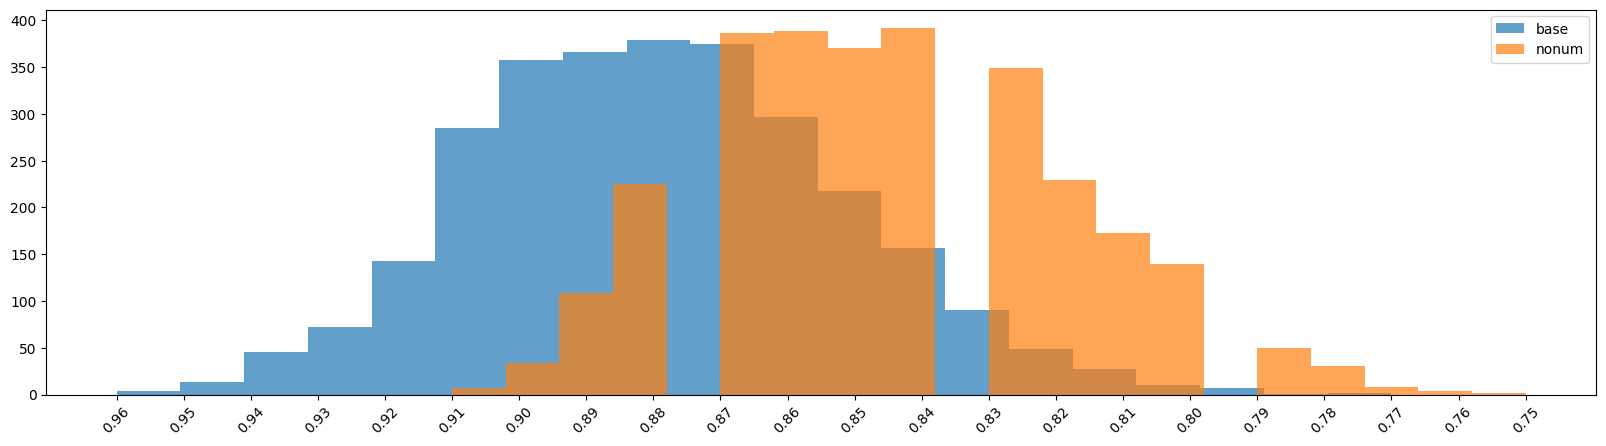

In [31]:
plt.figure(figsize=(20, 5))
plt.hist(m['cosine similarity'].apply(lambda x: format(x, '.2f')).values, label='base', bins=20, alpha=.7)
plt.hist(m['cosine similarity_wlabel'].apply(lambda x: format(x, '.2f')).values, label='nonum', bins=20, alpha=.7)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [33]:
m = pd.merge(
    compare_embeddings_of(presidents_df, parks_df, tabenc, 'rows'),
    compare_embeddings_of(presidents_df, parks_df, tabenc, 'rows', keepnumbers=False),
    on=['R1', 'R2'],
    suffixes=['', '_nonum']
)
m['delta'] = (m['cosine similarity'] - m['cosine similarity_nonum']).apply(lambda x: format(x, ".3f"))

In [34]:
m

,R1,R2,cosine similarity,cosine similarity_nonum,delta
0,20,30,0.960136,0.465785,0.494
1,37,19,0.958369,0.44322,0.515
2,37,38,0.955976,0.433126,0.523
3,37,33,0.955683,0.460699,0.495
4,12,30,0.954228,0.461717,0.493
...,...,...,...,...,...
2893,11,25,0.786609,0.415172,0.371
2894,14,17,0.785837,0.475801,0.310
2895,0,17,0.783606,0.427507,0.356
2896,11,17,0.774685,0.408577,0.366


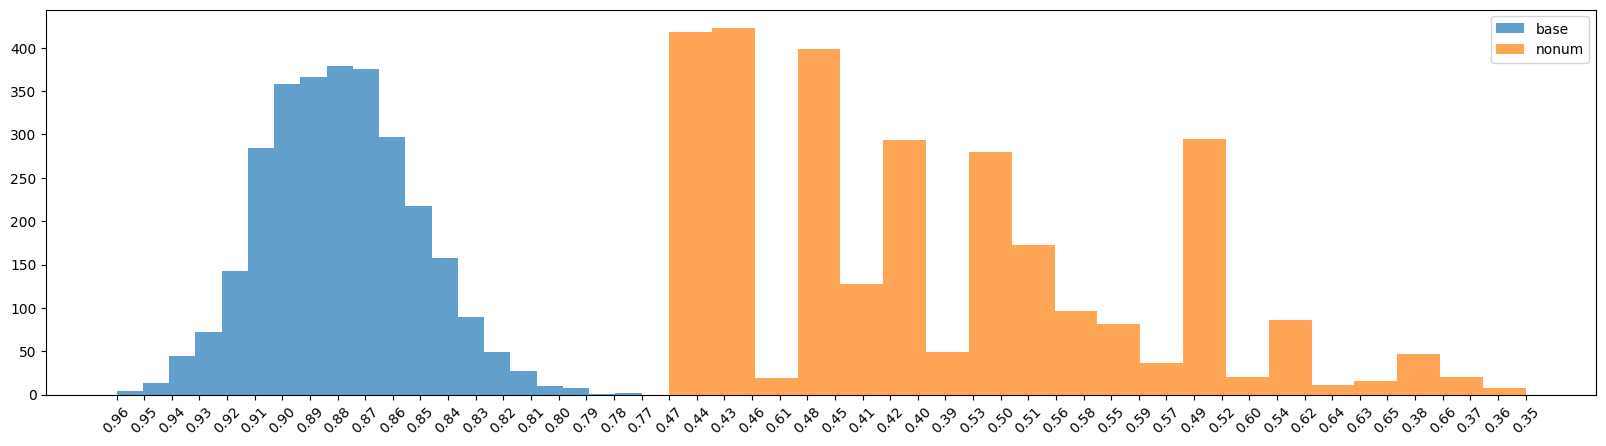

In [35]:
plt.figure(figsize=(20, 5))
plt.hist(m['cosine similarity'].apply(lambda x: format(x, '.2f')).values, label='base', bins=20, alpha=.7)
plt.hist(m['cosine similarity_nonum'].apply(lambda x: format(x, '.2f')).values, label='nonum', bins=20, alpha=.7)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [39]:
show_most_similar_rows(m[['R1', 'R2', 'cosine similarity']], presidents_df, parks_df, 1)

#0: 0.9601359545345971
	20: 21 Chester A. Arthur
(1829–1886) September 19, 1881
–
March 4, 1885 Republican – Vacant throughout
presidency
	30: Hawaiʻi Volcanoes ‡ Hawaii
19°23′N 155°12′W﻿ / ﻿19.38°N 155.20°W﻿ / 19.38; -155.20﻿ (Hawaiʻi Volcanoes) August 1, 1916 344,812.18 acres (1,395.4 km2) 1,580,961 This park on the Big Island protects the Kīlauea and Mauna Loa volcanoes, two of the world's most active geological features. Diverse ecosystems range from tropical forests at sea level to barren lava beds at more than 13,000 feet (4,000 m). (WHS) (BR)



In [40]:
show_most_similar_rows(m[['R1', 'R2', 'cosine similarity_nonum']], presidents_df, parks_df, 1)

#0: 0.4657845232028505
	20: 21 Chester A. Arthur
(1829–1886) September 19, 1881
–
March 4, 1885 Republican – Vacant throughout
presidency
	30: Hawaiʻi Volcanoes ‡ Hawaii
19°23′N 155°12′W﻿ / ﻿19.38°N 155.20°W﻿ / 19.38; -155.20﻿ (Hawaiʻi Volcanoes) August 1, 1916 344,812.18 acres (1,395.4 km2) 1,580,961 This park on the Big Island protects the Kīlauea and Mauna Loa volcanoes, two of the world's most active geological features. Diverse ecosystems range from tropical forests at sea level to barren lava beds at more than 13,000 feet (4,000 m). (WHS) (BR)



### Forests VS Parks

In [41]:
m = pd.merge(
    compare_embeddings_of(forests_df, parks_df, tabenc, 'rows'),
    compare_embeddings_of(forests_df, parks_df, tabenc, 'rows', add_label=True),
    on=['R1', 'R2'],
    suffixes=['', '_wlabel']
)
m['delta'] = (m['cosine similarity'] - m['cosine similarity_wlabel']).apply(lambda x: format(x, ".3f"))

In [42]:
m

,R1,R2,cosine similarity,cosine similarity_wlabel,delta
0,76,0,0.98816,0.958921,0.029
1,122,27,0.987506,0.957952,0.030
2,75,7,0.987362,0.958097,0.029
3,122,0,0.98708,0.963102,0.024
4,102,7,0.986979,0.945277,0.042


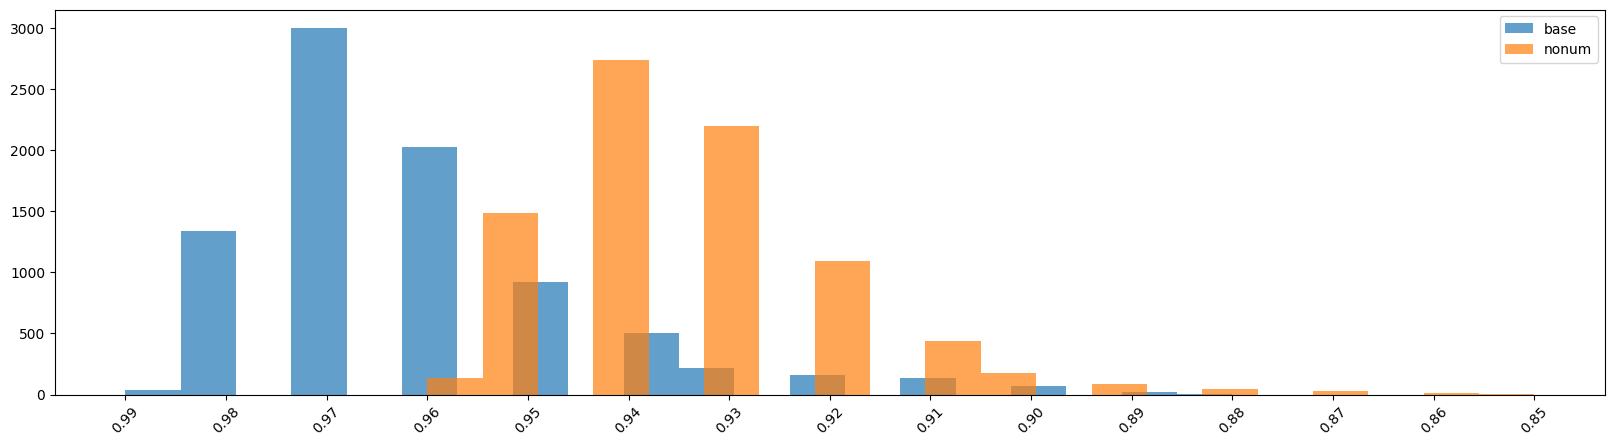

In [43]:
plt.figure(figsize=(20, 5))
plt.hist(m['cosine similarity'].apply(lambda x: format(x, '.2f')).values, label='base', bins=20, alpha=.7)
plt.hist(m['cosine similarity_wlabel'].apply(lambda x: format(x, '.2f')).values, label='nonum', bins=20, alpha=.7)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [44]:
m = pd.merge(
    compare_embeddings_of(forests_df, parks_df, tabenc, 'rows'),
    compare_embeddings_of(forests_df, parks_df, tabenc, 'rows', keepnumbers=False),
    on=['R1', 'R2'],
    suffixes=['', '_nonum']
)
m['delta'] = (m['cosine similarity'] - m['cosine similarity_nonum']).apply(lambda x: format(x, ".3f"))

In [45]:
m

,R1,R2,cosine similarity,cosine similarity_nonum,delta
0,76,0,0.98816,0.979629,0.009
1,122,27,0.987506,0.971609,0.016
2,75,7,0.987362,0.99003,-0.003
3,122,0,0.98708,0.988227,-0.001
4,102,7,0.986979,0.993218,-0.006
...,...,...,...,...,...
8437,69,17,0.884381,0.858542,0.026
8438,47,17,0.884346,0.91097,-0.027
8439,34,4,0.884227,0.844997,0.039
8440,63,17,0.883879,0.922696,-0.039


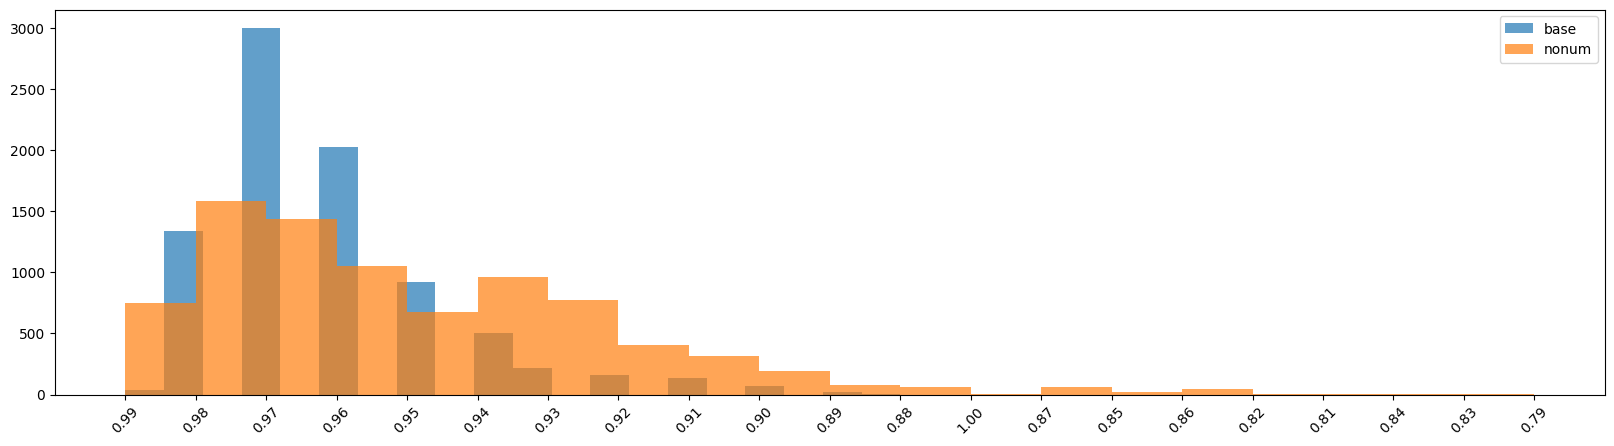

In [46]:
plt.figure(figsize=(20, 5))
plt.hist(m['cosine similarity'].apply(lambda x: format(x, '.2f')).values, label='base', bins=20, alpha=.7)
plt.hist(m['cosine similarity_nonum'].apply(lambda x: format(x, '.2f')).values, label='nonum', bins=20, alpha=.7)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [48]:
show_most_similar_rows(m[['R1', 'R2', 'cosine similarity']], forests_df, parks_df, 1)

#0: 0.98816006302736
	76: Monongahela West Virginia
38°33′N 79°54′W﻿ / ﻿38.550°N 79.900°W﻿ / 38.550; -79.900﻿ (Monongahela) April 28, 1920 920,583 acres (3,725.5 km2) Monongahela National Forest includes Spruce Knob–Seneca Rocks National Recreation Area and eight wilderness areas. Spruce Knob is the highest point in West Virginia at 4,863 ft (1,482 m), and Seneca Rocks is a 900 ft (270 m) quartzite crag.
	0: Acadia Maine
44°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W﻿ / 44.35; -68.21﻿ (Acadia) February 26, 1919 49,071.40 acres (198.6 km2) 3,970,260 Covering most of Mount Desert Island and other coastal islands, Acadia features the tallest mountain on the Atlantic coast of the United States, granite peaks, ocean shoreline, woodlands, and lakes. There are freshwater, estuary, forest, and intertidal habitats.



In [49]:
show_most_similar_rows(m[['R1', 'R2', 'cosine similarity_nonum']], forests_df, parks_df, 1)

#0: 0.9796294280140625
	76: Monongahela West Virginia
38°33′N 79°54′W﻿ / ﻿38.550°N 79.900°W﻿ / 38.550; -79.900﻿ (Monongahela) April 28, 1920 920,583 acres (3,725.5 km2) Monongahela National Forest includes Spruce Knob–Seneca Rocks National Recreation Area and eight wilderness areas. Spruce Knob is the highest point in West Virginia at 4,863 ft (1,482 m), and Seneca Rocks is a 900 ft (270 m) quartzite crag.
	0: Acadia Maine
44°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W﻿ / 44.35; -68.21﻿ (Acadia) February 26, 1919 49,071.40 acres (198.6 km2) 3,970,260 Covering most of Mount Desert Island and other coastal islands, Acadia features the tallest mountain on the Atlantic coast of the United States, granite peaks, ocean shoreline, woodlands, and lakes. There are freshwater, estuary, forest, and intertidal habitats.

